In [1]:
import os
import torch
import torch.nn as nn
from torch import Tensor
from torchvision import transforms
import matplotlib.pyplot as plt
from model import *

In [2]:
DATA_DIR = os.path.join(os.getcwd(), "..", "data")
MODELS_DIR = "D:\\models"

In [3]:
from PIL import Image


def read_image(path: str, mode: str = "RGB") -> Image:
    return Image.open(path).convert(mode)

In [4]:
def img_to_tensor(img: Image) -> Tensor:
    return transforms.Compose([transforms.Resize((256, 256)), transforms.ToTensor()])(img)

# Animal Segmentation

In [5]:
from typing import List


def plot_img_and_output(outputs: List[Tensor], masks: List[Tensor]):
    plt.figure(figsize=(15, 5))
    for i, (output, mask) in enumerate(zip(outputs, masks)):
        plt.subplot(2, 5, i + 1)
        plt.imshow(output.squeeze().cpu().numpy())
        plt.title("Output Image")
        plt.axis("off")
        plt.subplot(2, 5, i + 6)
        plt.imshow(mask.squeeze().cpu().numpy().transpose(1, 2, 0))
        plt.title("Input Image")
        plt.axis("off")
    plt.show()

In [6]:
img1 = read_image(os.path.join(DATA_DIR, "tests", "a.jpg"))
img2 = read_image(os.path.join(DATA_DIR, "tests", "japanese_chin_135.jpg"))
img3 = read_image(os.path.join(DATA_DIR, "tests", "saint_bernard_114.jpg"))

img1 = img_to_tensor(img1).unsqueeze(0).to("cuda")
img2 = img_to_tensor(img2).unsqueeze(0).to("cuda")
img3 = img_to_tensor(img3).unsqueeze(0).to("cuda")

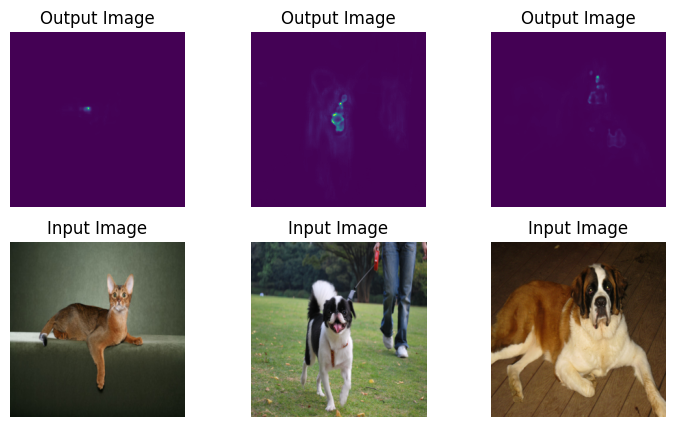

In [8]:
model = AnimalSegmentation().to("cuda")

path = os.path.join(MODELS_DIR, "animal_segmentation_0e3cb2a4-e49d-4f27-9a89-56304f6e7b7b.pth")
model.load_state_dict(torch.load(path))
model.eval()

with torch.no_grad():
    imgs = [img1, img2, img3]
    outputs = [model(img)[0] for img in imgs]
    plot_img_and_output(outputs, imgs)

Using cache found in C:\Users\Sergi/.cache\torch\hub\mateuszbuda_brain-segmentation-pytorch_master


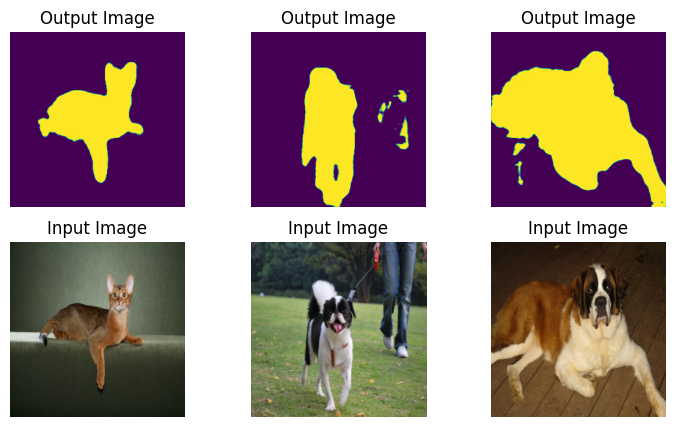

In [68]:
model = AnimalSegmentationPretained().to("cuda")
path = os.path.join(MODELS_DIR, "animal_segmentation_618f1d01-19b5-4eea-9c79-ebc3414e817a.pth")
model.load_state_dict(torch.load(path))
model.eval()

with torch.no_grad():
    imgs = [img1, img2, img3]
    outputs = [model(img)[0] for img in imgs]
    plot_img_and_output(outputs, imgs) 

Using cache found in C:\Users\Sergi/.cache\torch\hub\pytorch_vision_v0.10.0


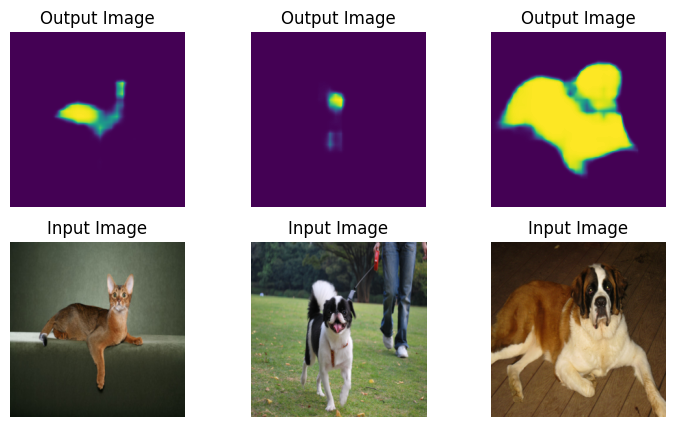

In [21]:
model = AnimalSegmentationPretained2().to("cuda")
path = os.path.join(MODELS_DIR, "animal_segmentation_d9e38a93-4b51-49b2-810b-ea0634d87454.pth")
model.load_state_dict(torch.load(path))
model.eval()

with torch.no_grad():
    imgs = [img1, img2, img3]
    outputs = [model(img)[0] for img in imgs]
    plot_img_and_output(outputs, imgs) 

# HeadDetection


0: 640x640 1 head, 1: 640x640 1 head, 2: 640x640 1 head, 102.0ms
Speed: 5.3ms preprocess, 34.0ms inference, 133.2ms postprocess per image at shape (1, 3, 640, 640)


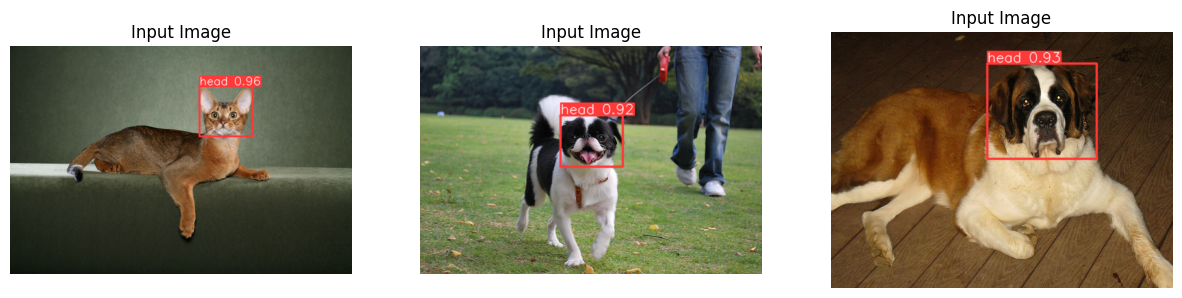

In [32]:
from ultralytics import YOLO

model = YOLO(os.path.join(MODELS_DIR, "headpos-best.pt")).to("cuda")

img1 = read_image(os.path.join(DATA_DIR, "tests", "a.jpg"))
img2 = read_image(os.path.join(DATA_DIR, "tests", "japanese_chin_135.jpg"))
img3 = read_image(os.path.join(DATA_DIR, "tests", "saint_bernard_114.jpg"))

results = model.predict([img1, img2, img3])
imgs = [Image.fromarray(r.plot()[..., ::-1]) for r in results]

plt.figure(figsize=(15, 5))
for i, img in enumerate(imgs):
    plt.subplot(1, 3, i + 1)
    plt.imshow(img)
    plt.title("Input Image")
    plt.axis("off")
plt.show()

# Cat vs Dog Classification

In [43]:
img1 = read_image(os.path.join(DATA_DIR, "tests", "a.jpg"))
img2 = read_image(os.path.join(DATA_DIR, "tests", "japanese_chin_135.jpg"))
img3 = read_image(os.path.join(DATA_DIR, "tests", "saint_bernard_114.jpg"))

img1 = img_to_tensor(img1).unsqueeze(0).to("cuda")
img2 = img_to_tensor(img2).unsqueeze(0).to("cuda")
img3 = img_to_tensor(img3).unsqueeze(0).to("cuda")

In [57]:
from typing import Dict


def label_vs_predicted_class(inputs: List[Tensor], outputs: List[Tensor], labels: List[Tensor], label_map: Dict[int, str]):
    plt.figure(figsize=(15, 5))
    # Plot the images in the batch, along with predicted and true labels
    for i, (input, output, label) in enumerate(zip(inputs, outputs, labels)):
        # Each polt will contain the image, predicted class: class predicted (probability), true class: class true
        plt.subplot(1, 3, i + 1)
        plt.imshow(input.squeeze().cpu().numpy().transpose(1, 2, 0))
        output = torch.softmax(output, dim=1)
        pred = label_map.get(output.argmax(dim=1).item(), "Other")
        conf = output.max(dim=1).values.item()
        plt.title(f"Predicted: {pred} ({conf:.2f}), True: {label_map[label.item()]}")
        plt.axis("off")

    plt.show()

Using cache found in C:\Users\Sergi/.cache\torch\hub\pytorch_vision_v0.10.0
d:\miniconda3\envs\aa\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
d:\miniconda3\envs\aa\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


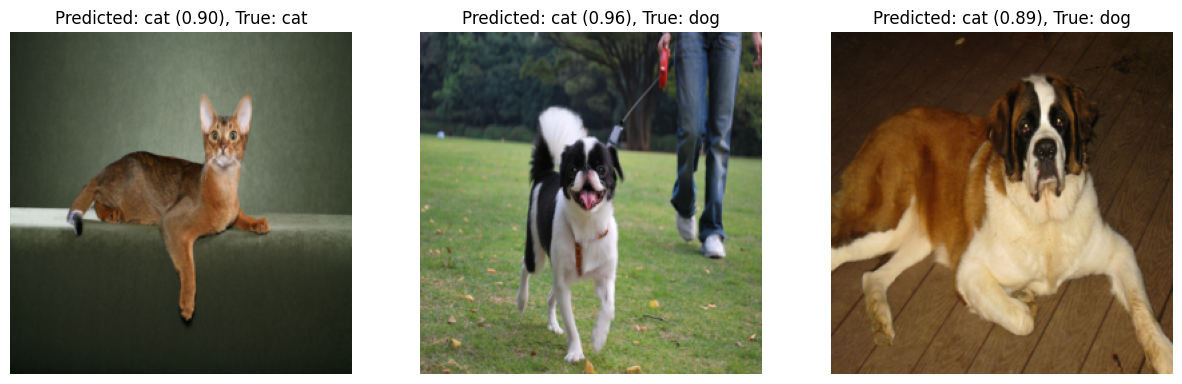

In [58]:
model = CatDogClassifier().to("cuda")
path = os.path.join(MODELS_DIR, "cat_dog_classifier_c33726a6-07cb-43e4-86ec-43451067f06f.pth")
model.load_state_dict(torch.load(path))
model.eval()

with torch.no_grad():
    imgs = [img1, img2, img3]
    outputs = [model(img) for img in imgs]
    labels = Tensor([0, 1, 1])
    label_vs_predicted_class(imgs, outputs, labels, {0: "cat", 1: "dog"})

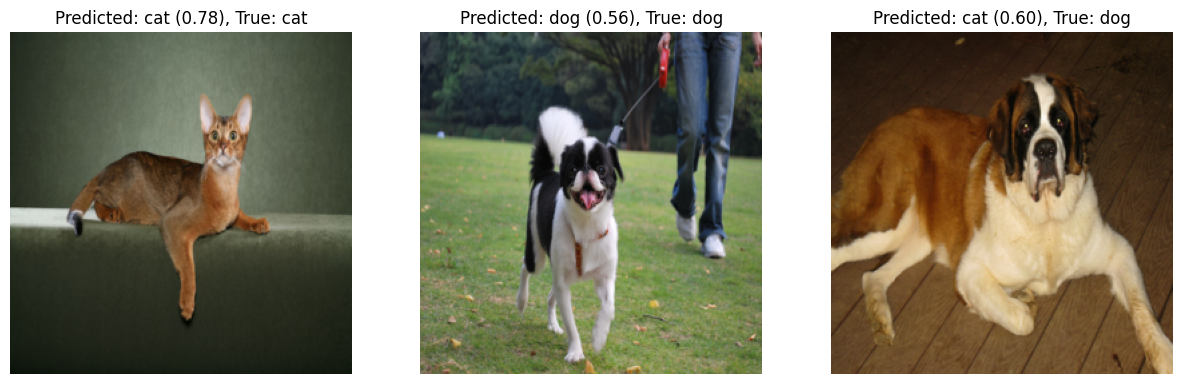

In [61]:
model = CatDogClassifierV2().to("cuda")
path = os.path.join(MODELS_DIR, "cat_dog_classifier_b74bfe33-c3e3-4265-bd8e-4bd8fcc07ec3.pth")
model.load_state_dict(torch.load(path))
model.eval()

with torch.no_grad():
    imgs = [img1, img2, img3]
    outputs = [model(img) for img in imgs]
    labels = Tensor([0, 1, 1])
    label_vs_predicted_class(imgs, outputs, labels, {0: "cat", 1: "dog"})

Using cache found in C:\Users\Sergi/.cache\torch\hub\pytorch_vision_v0.10.0
d:\miniconda3\envs\aa\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
d:\miniconda3\envs\aa\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


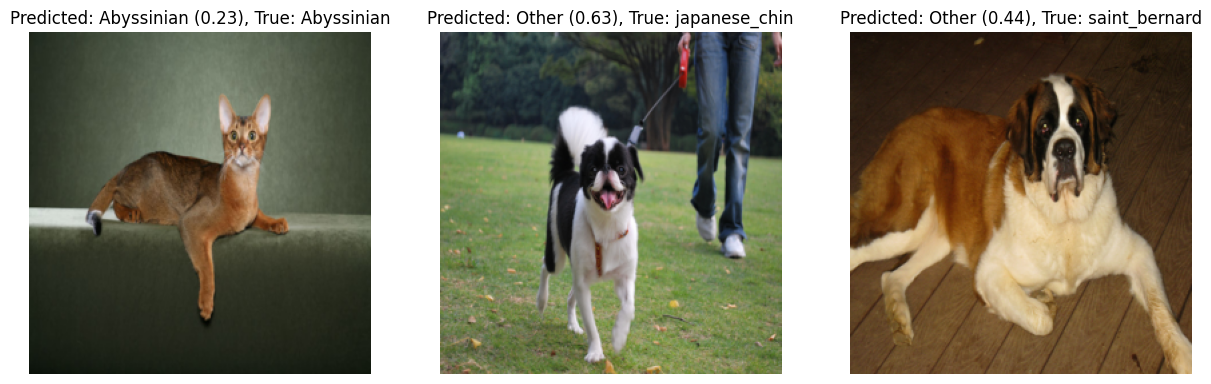

In [62]:
model = RaceClassifier().to("cuda")
path = os.path.join(MODELS_DIR, "race_classifier_e3136a0b-77a1-4335-b833-55ed999a1a52.pth")
model.load_state_dict(torch.load(path))
model.eval()

with torch.no_grad():
    imgs = [img1, img2, img3]
    outputs = [model(img) for img in imgs]
    labels = Tensor([0, 17, 28])
    label_vs_predicted_class(imgs, outputs, labels, {0: "Abyssinian", 17: "japanese_chin", 28: "saint_bernard"})